# Impact of varying the caring coefficient

### Grid World Description:
There are two agents.
Both have the objective of reaching their respective door.
Both their rewards are -1 except when they reach their doors.
There are 8 actions (4 movements, 1 do nothing, 1 pick up, 1 drop, and 1 use).
The episode terminates if they collide with the wall, or with each other.


## Aim:
Show that if we consider red agent to start caring, it can avoid negative effects.
We can increase this "caring" by increasing the caring coefficient, but a big value can in fact be bad for both.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from collections import defaultdict
import random
plt.style.use("ggplot")
rcParams['figure.figsize'] = 10, 10

In [ ]:
class Kitchen:
  
  def __init__(self):
    pass

In [30]:
goo = True
not goo

False

In [115]:
dimension = 9

# represents the size of the world
main_axis = ['', '1', '2', '3', '4','5', '6', '7', '8', '9', '', '']
grid_x_axis = grid_axis = np.linspace(0, 9, 12)
grid_y_axis = np.linspace(0, 3, 3)
grid_interval = grid_axis[1] - grid_axis[0]
door_width = 0.1
grid_world = np.zeros((dimension+1, dimension+1))

class EscapeRoom:

    def __init__(self):
        """
        Initializes everything
        """

        # setting default values
        default_params = {'p1' : [6, 1], 'p2' : [9, 1], 'd1' : [1,1], 'door_opened': False, 's1' : False, 's2': False}
        
        self.actions1= {0: "left", 1: "right", 2:"search for ingredients", 3:"open/close fridge"}

        # defining keys and doors
        self.d1 = default_params['d1']
        
        # agents
        self.p1 = default_params['p1']
        self.p2 = default_params['p2']
        self.s1 = default_params['s1']
        self.s2 = default_params['s2']
        
        self.door_open = default_params['door_opened']
        
        # state
        self.state = [self.p1, self.p2, self.s1, self.s2, self.door_open]
        
        self.reward_array = [-1, -1]
        # walls
        self.walls = [[0, i] for i in range(3)] + [[i, 0] for i in range(9)] + [[9,9] for i in range(9)] + [[9,i] for i in range(3)]
        self.real_wall = [[0,1],[10,1], [11,1]]


    def reset(self):
        """
        Resets the board from start
        Returns:
            state: the initial state
        """

        # setting default values
        default_params = {'p1' : [6, 1], 'p2' : [9, 1], 'd1' : [1,1], 'door_opened': False, 's1' : False, 's2': False}
        
        # defining keys and doors
        self.d1 = default_params['d1']
        
        # agents
        self.p1 = default_params['p1']
        self.p2 = default_params['p2']
        self.s1 = default_params['s1']
        self.s2 = default_params['s2']
        self.door_open = default_params['door_opened']
        
        self.reward_array = [-1, -1]
        # state
        self.state = [self.p1, self.p2, self.s1, self.s2, self.door_open]

        return self.state

    def step(self, action = [0,0]):

        """
        Args:
            action: This is an array with two entries, one of the first agent, and the other of the second agent
        Returns:
            state space: This is the current position of all the agents, the respective keys and their inventories
            reward: This is an array, which has two entries, one for each agent
            terminated: A boolean indicator of weather the episode had ended or not
            None: simply used for debugging
        """

        ############ MOVING FIRST AGENT #######################

        # movements
        if action[0] == 0:
          self.p1[0] -= 1
          if self.p1 in self.real_wall:
            self.p1[0] += 1
        elif action[0] == 1:
          self.p1[0] += 1
          if self.p1 in self.real_wall:
            self.p1[0] -= 1
        elif action[1] == 3:
          self.door_open = not self.door_open
        elif action[0] == 2 and self.p1 == self.d1 and self.door_open and not self.s1:
          self.s1 = True
          self.reward_array[0] = 10
        
        ##################### NOW IT IS AGENT 2'S TURN ###########################

        if action[1] == 0:
          self.p2[0] -= 1
          if self.p2 in self.real_wall:
            self.p2[0] += 1
        elif action[1] == 1:
          self.p2[0] += 1
          if self.p2 in self.real_wall:
            self.p2[0] -= 1
        elif action[1] == 3:
          self.door_open = not self.door_open
        elif action[1] == 2 and self.p2 == self.d1 and self.door_open and not self.s2:
          self.s2 = True
          self.reward_array[1] = 10
        else:
          pass

        # if no one at door of fridge, then spoil the ingredients
        if self.door_open and self.p1 != self.d1 and self.p2 != self.d1:
          if not self.s1:
            self.reward_array[0] = -10
          if not self.s2:
            self.reward_array[1] = -10
        
        # state
        self.state = [self.p1, self.p2, self.s1, self.s2, self.door_open]

        ## you reached the goal!
        if self.s2 and self.s1 and not self.door_open:
          return self.state, self.reward_array, True, None

        return self.state, self.reward_array, False, None

    def render(self):

        # to change positions
        agent1 = plt.Circle((grid_interval*(self.p1[0]+0.5),grid_interval*(self.p1[1]+0.5)), 0.3, color='yellow', alpha = 0.7)
        agent2 = plt.Circle((grid_interval*(self.p2[0]+0.5),grid_interval*(self.p2[1]+0.5)), 0.3, color='blue', alpha = 0.5)
        if self.door_open:
          door1 = plt.Rectangle((self.d1[0]*grid_interval, self.d1[1]*grid_interval), grid_interval, grid_interval, color = "red", alpha = 0.8)
        else:
          door1 = plt.Rectangle((self.d1[0]*grid_interval, self.d1[1]*grid_interval), grid_interval, grid_interval, color = "green", alpha = 0.8)
  
        # wall -> DO NOT CHANGE
        wall1 = plt.Rectangle((0,0), grid_interval, 13, color = "black")
        wall2 = plt.Rectangle((0,0), 13, grid_interval, color = "black")
        wall4 = plt.Rectangle((0,grid_axis[2]), 13, grid_axis[1], color = "black")
        wall3 = plt.Rectangle((grid_axis[-2],0),grid_axis[1], 13, color = "black")

        # get plot axis
        fig = plt.figure(figsize = (9,3))
        ax = plt.gca()

        # wall -> DO NOT CHANGE
        ax.add_patch(wall1)
        ax.add_patch(wall2)
        ax.add_patch(wall3)
        ax.add_patch(wall4)

        # world definitions
        ax.add_patch(door1)

        # plot agents
        ax.add_patch(agent1)
        ax.add_patch(agent2)

        plt.xticks(ticks = grid_x_axis, labels = main_axis)
        plt.yticks(ticks = grid_y_axis, labels = ['', '1', '2'])
        plt.show()

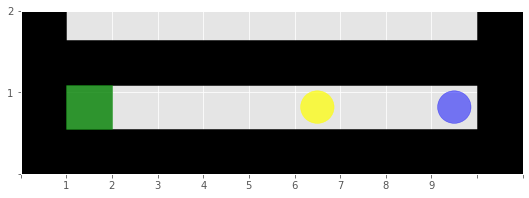

In [116]:
world = EscapeRoom()
world.render()

[[5, 1], [8, 1], False, False, False] [-1, -1] False


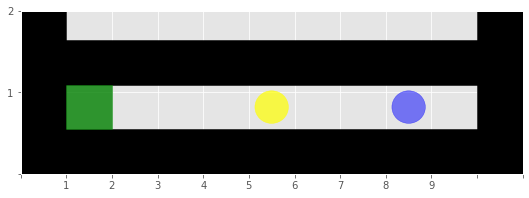

[[5, 1], [7, 1], False, False, False] [-1, -1] False


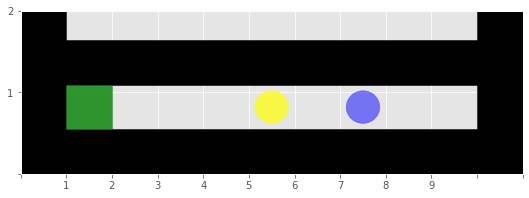

[[5, 1], [8, 1], False, False, False] [-1, -1] False


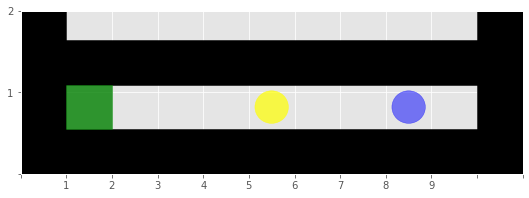

[[5, 1], [7, 1], False, False, False] [-1, -1] False


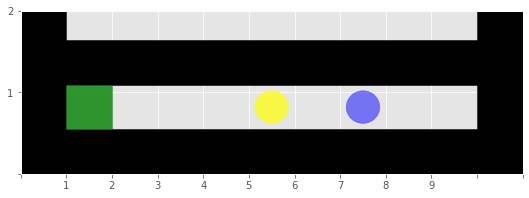

[[5, 1], [8, 1], False, False, False] [-1, -1] False


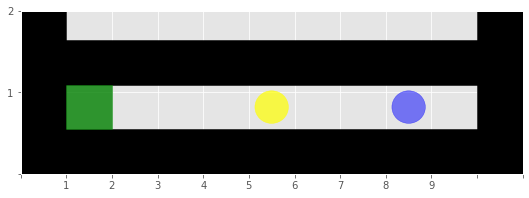

[[5, 1], [8, 1], False, False, False] [-1, -1] False


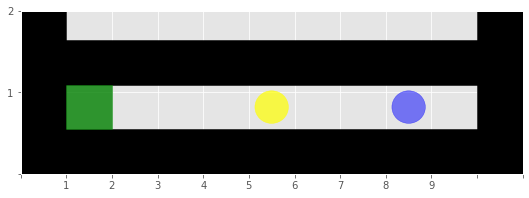

[[4, 1], [8, 1], False, False, True] [-10, -10] False


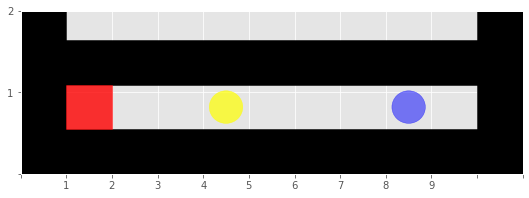

[[4, 1], [8, 1], False, False, True] [-10, -10] False


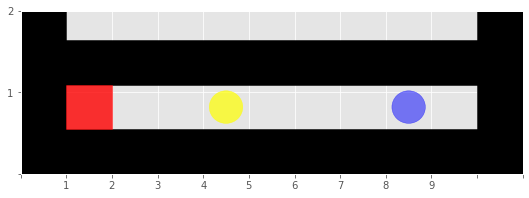

[[4, 1], [8, 1], False, False, True] [-10, -10] False


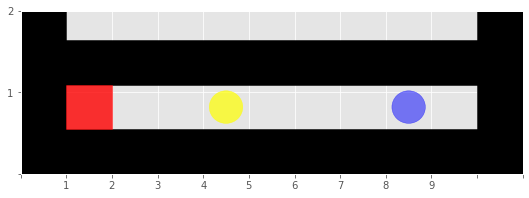

[[4, 1], [8, 1], False, False, True] [-10, -10] False


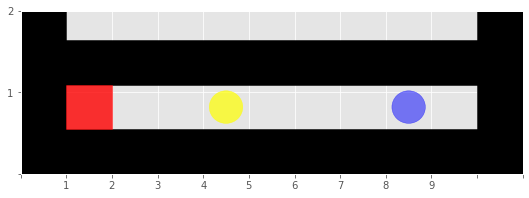

[[3, 1], [9, 1], False, False, True] [-10, -10] False


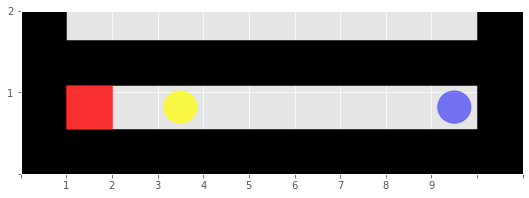

[[3, 1], [9, 1], False, False, True] [-10, -10] False


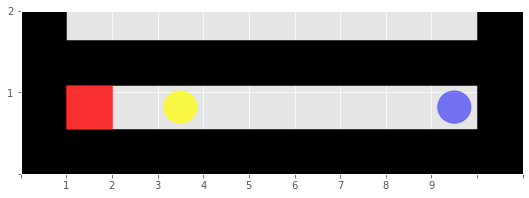

[[2, 1], [9, 1], False, False, True] [-10, -10] False


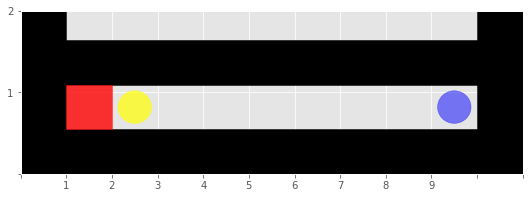

[[1, 1], [9, 1], False, False, True] [-10, -10] False


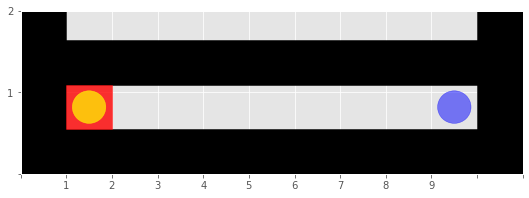

[[1, 1], [8, 1], True, False, True] [10, -10] False


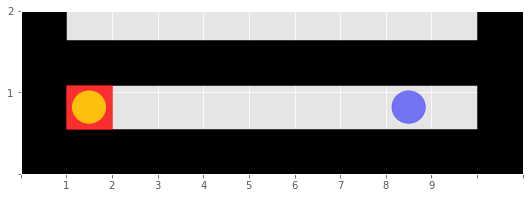

[[1, 1], [7, 1], True, False, True] [10, -10] False


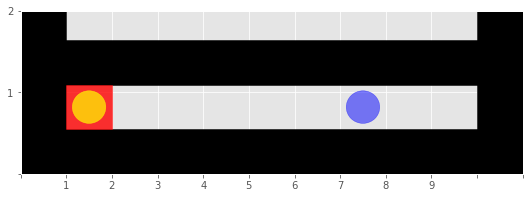

[[1, 1], [7, 1], True, False, True] [10, -10] False


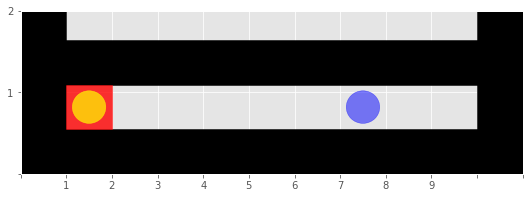

[[1, 1], [7, 1], True, False, True] [10, -10] False


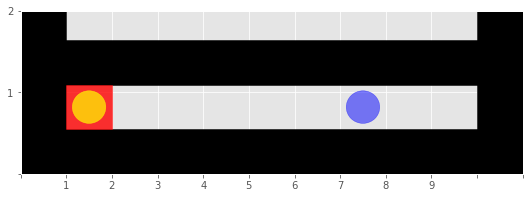

[[1, 1], [7, 1], True, False, True] [10, -10] False


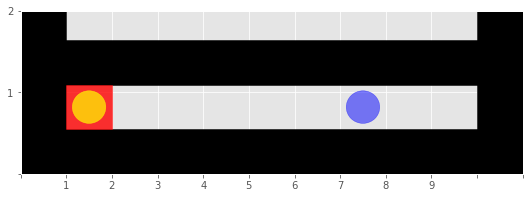

[[2, 1], [7, 1], True, False, False] [10, -10] False


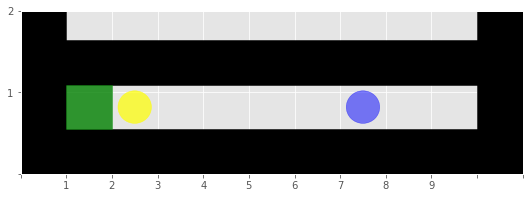

[[3, 1], [7, 1], True, False, False] [10, -10] False


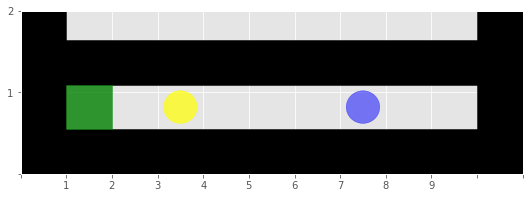

[[2, 1], [8, 1], True, False, False] [10, -10] False


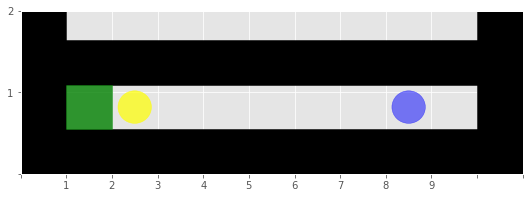

[[3, 1], [7, 1], True, False, False] [10, -10] False


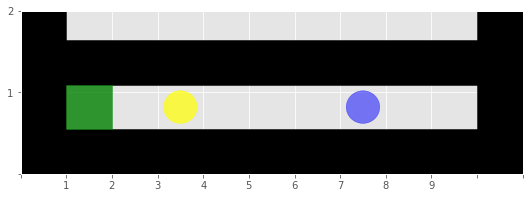

[[2, 1], [8, 1], True, False, False] [10, -10] False


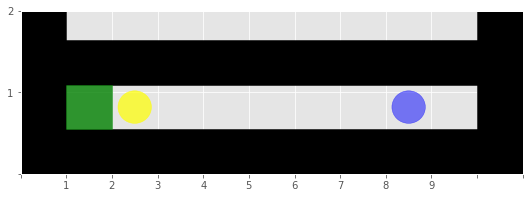

[[1, 1], [9, 1], True, False, False] [10, -10] False


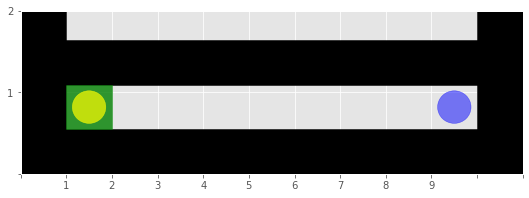

[[1, 1], [8, 1], True, False, False] [10, -10] False


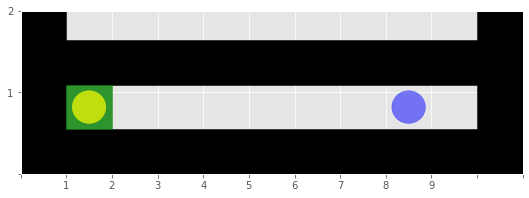

[[2, 1], [7, 1], True, False, False] [10, -10] False


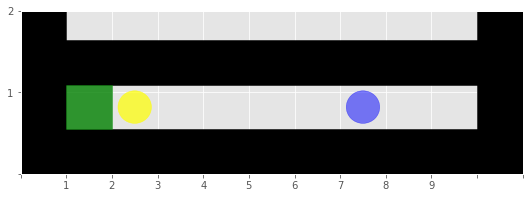

[[1, 1], [8, 1], True, False, False] [10, -10] False


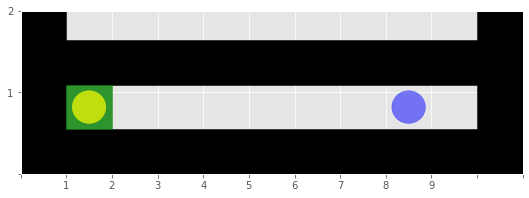

[[1, 1], [7, 1], True, False, False] [10, -10] False


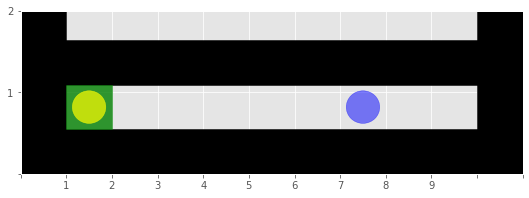

[[1, 1], [7, 1], True, False, False] [10, -10] False


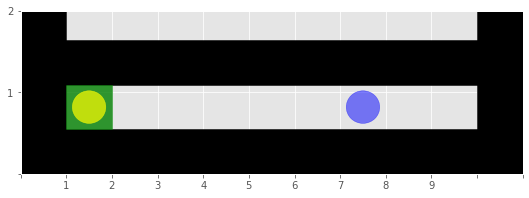

[[1, 1], [7, 1], True, False, False] [10, -10] False


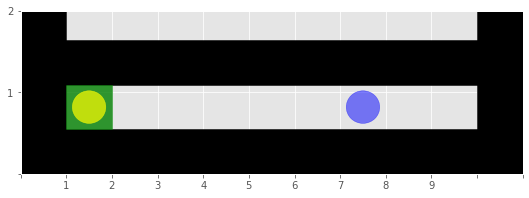

[[1, 1], [7, 1], True, False, False] [10, -10] False


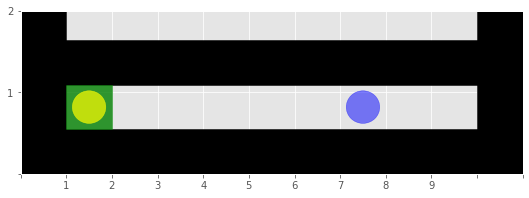

[[1, 1], [7, 1], True, False, False] [10, -10] False


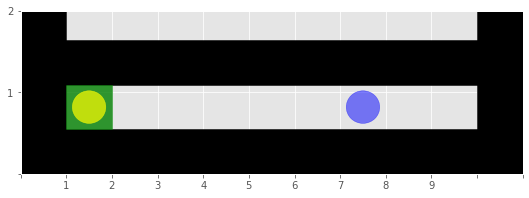

[[2, 1], [7, 1], True, False, True] [10, -10] False


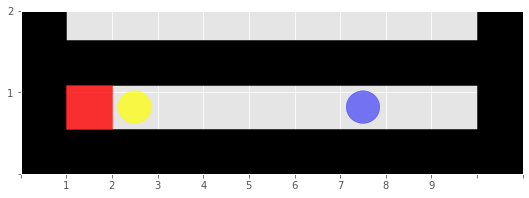

[[2, 1], [7, 1], True, False, True] [10, -10] False


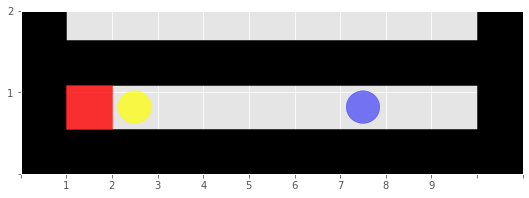

[[3, 1], [6, 1], True, False, True] [10, -10] False


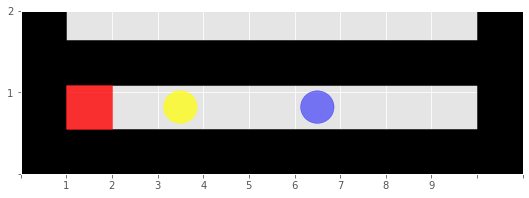

[[4, 1], [6, 1], True, False, False] [10, -10] False


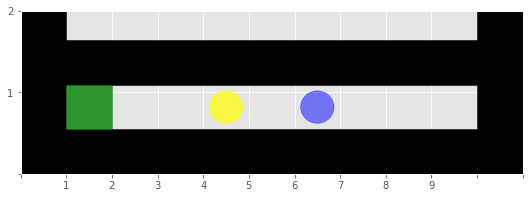

[[5, 1], [6, 1], True, False, True] [10, -10] False


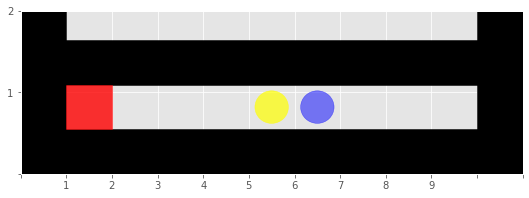

[[6, 1], [6, 1], True, False, True] [10, -10] False


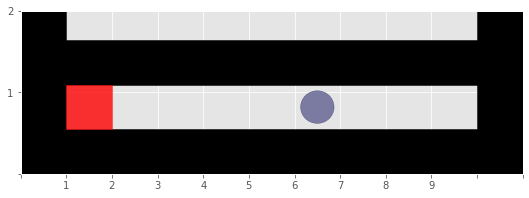

[[6, 1], [5, 1], True, False, True] [10, -10] False


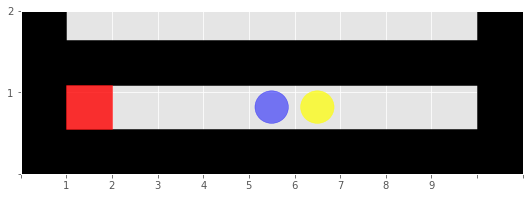

[[5, 1], [5, 1], True, False, False] [10, -10] False


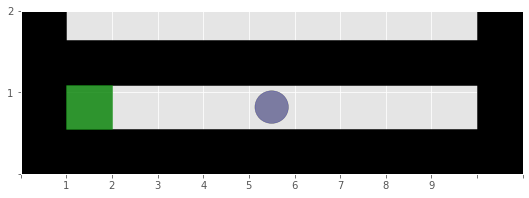

[[5, 1], [5, 1], True, False, False] [10, -10] False


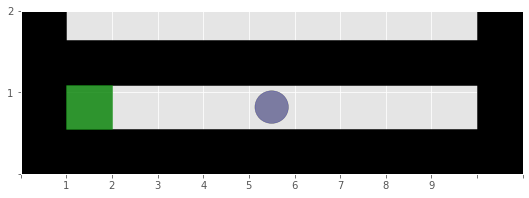

[[4, 1], [5, 1], True, False, True] [10, -10] False


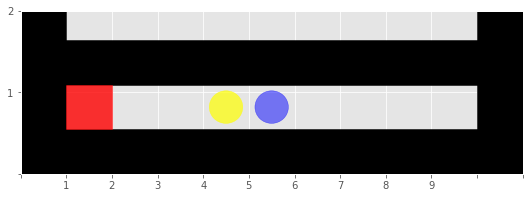

[[3, 1], [5, 1], True, False, False] [10, -10] False


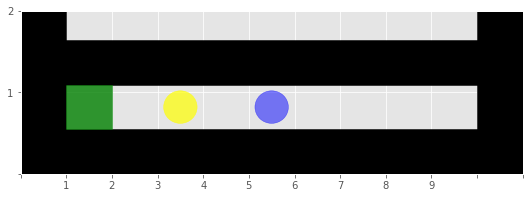

[[3, 1], [5, 1], True, False, False] [10, -10] False


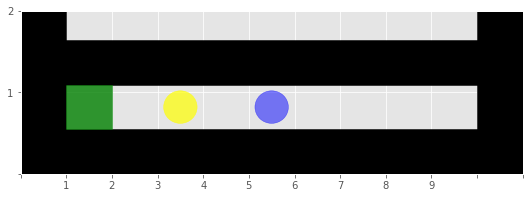

[[3, 1], [5, 1], True, False, False] [10, -10] False


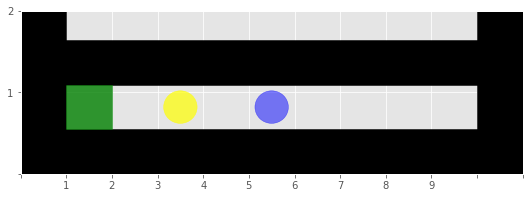

[[2, 1], [6, 1], True, False, False] [10, -10] False


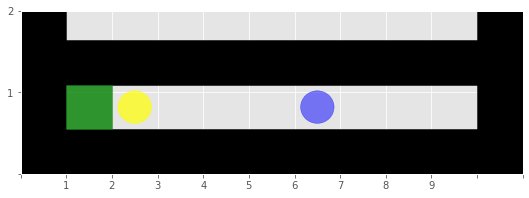

[[1, 1], [6, 1], True, False, True] [10, -10] False


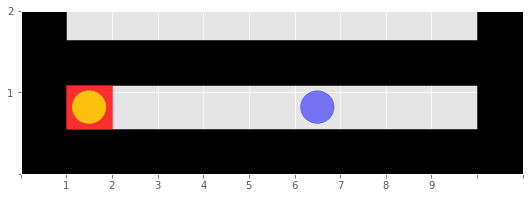

[[2, 1], [6, 1], True, False, True] [10, -10] False


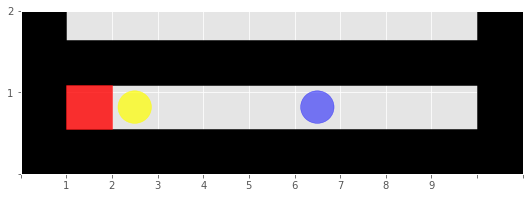

[[2, 1], [6, 1], True, False, True] [10, -10] False


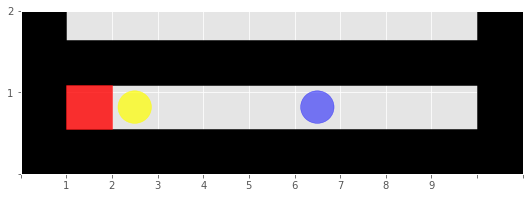

[[3, 1], [5, 1], True, False, True] [10, -10] False


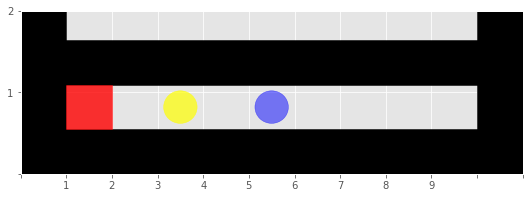

[[3, 1], [6, 1], True, False, True] [10, -10] False


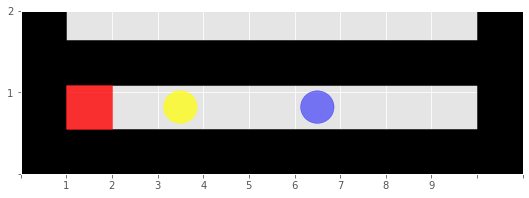

[[2, 1], [6, 1], True, False, False] [10, -10] False


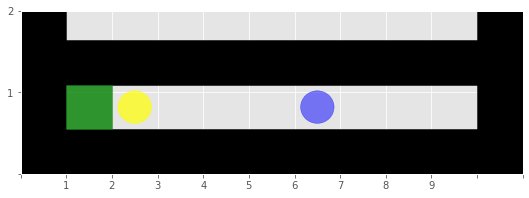

[[2, 1], [5, 1], True, False, False] [10, -10] False


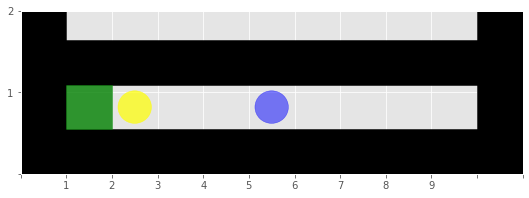

[[3, 1], [6, 1], True, False, False] [10, -10] False


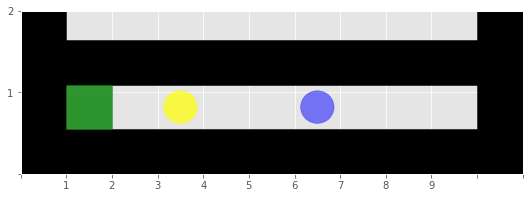

[[3, 1], [7, 1], True, False, False] [10, -10] False


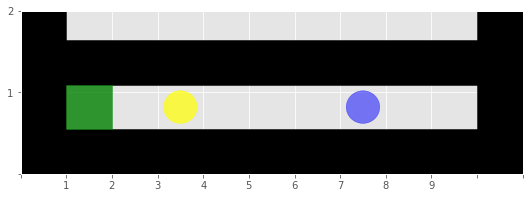

[[3, 1], [6, 1], True, False, False] [10, -10] False


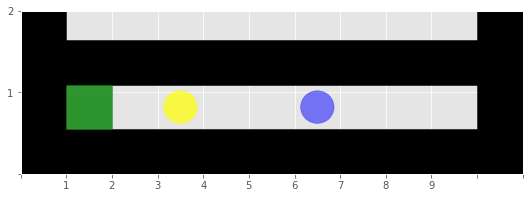

[[4, 1], [6, 1], True, False, False] [10, -10] False


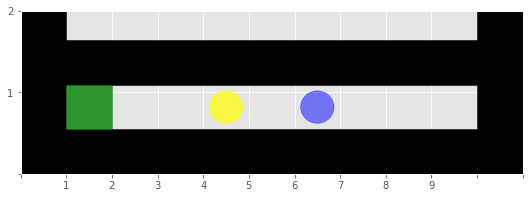

[[4, 1], [5, 1], True, False, False] [10, -10] False


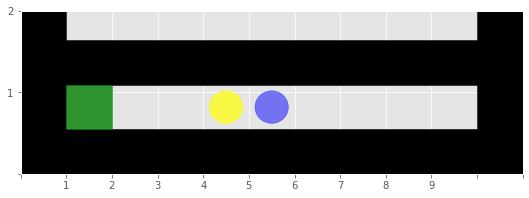

[[4, 1], [5, 1], True, False, False] [10, -10] False


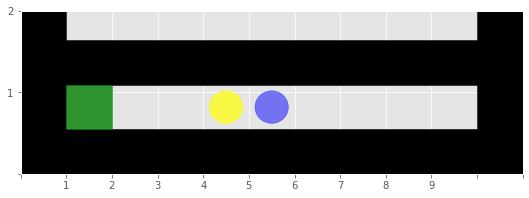

[[5, 1], [6, 1], True, False, False] [10, -10] False


KeyboardInterrupt: ignored

In [117]:
# random testing
world = EscapeRoom()
state=world.reset()
state,reward,done,_=world.step()
while not done:
  action1=random.randint(0,3)
  action2=random.randint(0,3)
  state,reward,done,_=world.step([action1,action2])
  print(state,reward,done)
  world.render()

In [118]:
q=defaultdict(int)
alpha=0.1
epsilon=1.0
gamma=0.99

In [119]:
def epsilon_greedy_policy(q,state,epsilon):
  actions=4
  if random.uniform(0,1)<epsilon:
    return [random.randint(0,actions-1),random.randint(0,actions-1)]
  else:
    l=-100000000000
    index=[]
    for i in np.arange(actions):
      for j in np.arange(actions):
        if q[(state[0][0],state[0][1],state[1][0],state[1][1],i,j)]>l:
          l=q[(state[0][0],state[0][1],state[1][0],state[1][1],i,j)]
          index=[i,j]
  return index

In [120]:
def episode_simulator(epsilon):
  env = EscapeRoom()
  prev_state=env.reset()
  states=[]
  actions=[]
  rewards=[]
  while True:
    #env.render()
    action=epsilon_greedy_policy(q,prev_state,epsilon)
    print(action)
    next_state,reward,done,_=env.step(action)
    states.append(next_state)
    actions.append(action)
    rewards.append(reward)
    prev_state=next_state
    if done==True:
      break
  return(states,actions,rewards)

In [121]:
def update_qtable(q,prev_state,action,reward,next_state,alpha,gamma):
  actions=4
  qa=-1000000000
  for i in np.arange(actions):
    for j in np.arange(actions):
      if q[(state[0][0],state[0][1],state[1][0],state[1][1],i,j)]>qa:
        qa=q[(state[0][0],state[0][1],state[1][0],state[1][1],i,j)]
  q[(prev_state[0][0],prev_state[0][1],prev_state[1][0],prev_state[1][1],action[0],action[1])]=q[(prev_state[0][0],prev_state[0][1],prev_state[1][0],prev_state[1][1],action[0],action[1])]+alpha*(gamma*qa+reward-q[(prev_state[0][0],prev_state[0][1],prev_state[1][0],prev_state[1][1],action[0],action[1])])
  return q

# Learning the Q-function of agent 1 

In [127]:
#i=0
q=defaultdict(lambda:1/4)
epsilon=1.0

number_of_red_wins =  []

no_iter=100000
avg_reward=[]

env=EscapeRoom()

for episode in np.arange(no_iter):
  
  r1=0
  i=1
  state=env.reset()
  epsilon = max(epsilon*0.99999,0.2)

  while True:
    action=epsilon_greedy_policy(q,state,epsilon)

    next_state,reward,done,_=env.step(action)

    update_qtable(q,state,action,reward[0],next_state,alpha,gamma)

    r1+=reward[0]

    state=next_state

    i+=1
    number_of_red_wins.append(0)
    
    if done:
      avg_reward.append(r1/i)
      break

    if i==400:
      break 

#env.close()

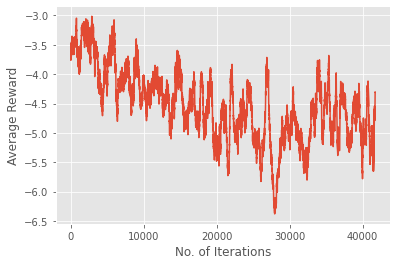

In [128]:
avg_reward2=[]
r=0

drange=200
for i in np.arange(drange,len(avg_reward)-drange):
  r=np.mean(avg_reward[i-drange:i+drange])
  avg_reward2.append(r)

plt.plot(avg_reward2)
plt.xlabel("No. of Iterations")
plt.ylabel("Average Reward")
plt.show()

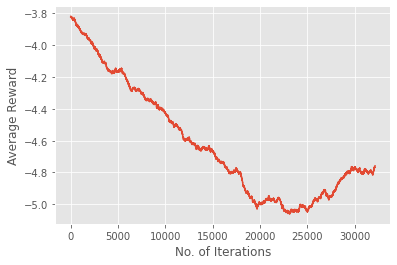

In [129]:
avg_reward2=[]
r=0

drange=5000
for i in np.arange(drange,len(avg_reward)-drange):
  r=np.mean(avg_reward[i-drange:i+drange])
  avg_reward2.append(r)

plt.plot(avg_reward2)
plt.xlabel("No. of Iterations")
plt.ylabel("Average Reward")
plt.show()

In [ ]:
def epsilon_greedy_policy(q,state,epsilon):
  actions=8
  if random.uniform(0,1)<epsilon:
    return [random.randint(0,actions-1),random.randint(0,actions-1)]
  else:
    l=-100000000000
    index=[]
    for i in range(actions):
      for j in range(actions):
        if q[(state[0][0],state[0][1],state[1][0],state[1][1],i,j)]>l:
          l=q[(state[0][0],state[0][1],state[1][0],state[1][1],i,j)]
          index=[i,j]
  return index

In [ ]:
world = EscapeRoom()
state=world.reset()
state,reward,done,_=world.step()
while(done!=True):
  action=epsilon_greedy_policy(q,state,0.8)
  state,reward,done,_=world.step(action)
  world.render()

# Second Agent Training

In [132]:
q2=defaultdict(int)

In [ ]:
alpha=0.1
epsilon=1
gamma=0.99
caring_parameter=1

In [ ]:
i=0
epsilon=1
no_iter=100000
avg_reward=[]
for episode in range(no_iter):
  r=0
  i=1
  state=env.reset()
  epsilon = max(epsilon*0.999999, 0.2)
  while True:

    action=epsilon_greedy_policy(q2,state,epsilon)
    next_state,reward,done,_=env.step(action)

    update_qtable(q2,state,action,reward[1]+gamma*caring_parameter*min(0.0,q[(state[0][0],state[0][1],state[1][0],state[1][1],action[0],action[1])]),next_state,alpha,gamma)

    state=next_state

    r+=reward[1]+reward[0]

   
    i+=1

    #print(reward)
    #r1+=reward[0]
    #r2+=reward[1]

    if done==True:
      avg_reward.append(r/i)
      break

    if i == 75:
      break
#env.close()

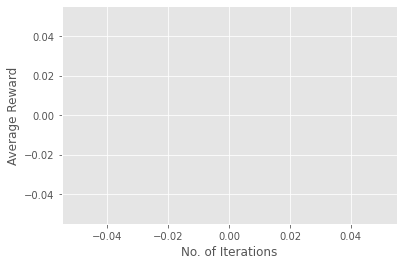

In [135]:
avg_reward2=[]
r=0

drange=500
for i in np.arange(drange,len(avg_reward)-drange):
  r=np.mean(avg_reward[i-drange:i+drange])
  avg_reward2.append(r)

plt.plot(avg_reward2)
plt.xlabel("No. of Iterations")
plt.ylabel("Average Reward")
plt.show()

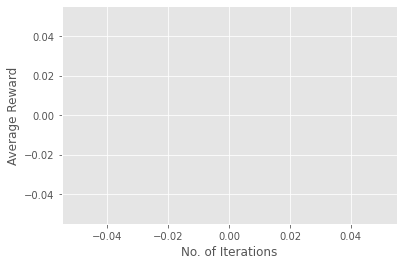

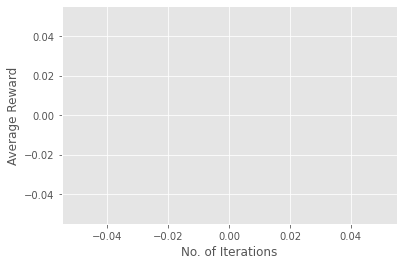

In [136]:
avg_reward2=[]
r=0

drange=5000
for i in np.arange(drange,len(avg_reward)-drange):
  
  r=np.mean(avg_reward[i-drange:i+drange])
  avg_reward2.append(r)

plt.plot(avg_reward2)
plt.xlabel("No. of Iterations")
plt.ylabel("Average Reward")
plt.show()